# Financial Distress Prediction

Given the historical data about different people getting loans and how they performed, This study revolves around predicting whether or not a person is going to have trouble paying his loan.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/give-me-some-credit-dataset/Data Dictionary.xls
/kaggle/input/give-me-some-credit-dataset/cs-training.csv
/kaggle/input/give-me-some-credit-dataset/sampleEntry.csv
/kaggle/input/give-me-some-credit-dataset/cs-test.csv


# **Downloading The Data**

In [2]:
train_data = pd.read_csv("../input/give-me-some-credit-dataset/cs-training.csv")
test_data = pd.read_csv("../input/give-me-some-credit-dataset/cs-test.csv")

In [3]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)

# Feature Description

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse Y/N.

**RevolvingUtilizationOfUnsecuredLines** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage
age Age of borrower in years integer.

**NumberOfTime3059DaysPastDueNotWorse** Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer.

**DebtRatio** Monthly debt payments, alimony,living costs divided by monthly gross income percentage.

**MonthlyIncome** Monthly income real.

**NumberOfOpenCreditLinesAndLoans** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer.

**NumberOfTimes90DaysLate** Number of times borrower has been 90 days or more past due. integer

**NumberRealEstateLoansOrLines** Number of mortgage and real estate loans including home equity lines of credit integer.

**NumberOfTime60-89DaysPastDueNotWorse** Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer.

**NumberOfDependents** Number of dependents in family excluding themselves (spouse, children etc.) integer

In [4]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Cleaning The Data

In [5]:
train_data.dropna(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtype

# Exploring The Data

In [6]:
train_data.drop(index=train_data[train_data.SeriousDlqin2yrs == 4].index, inplace=True)

In [7]:
train_data.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    103063
age                                         83
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               109658
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

<AxesSubplot:>

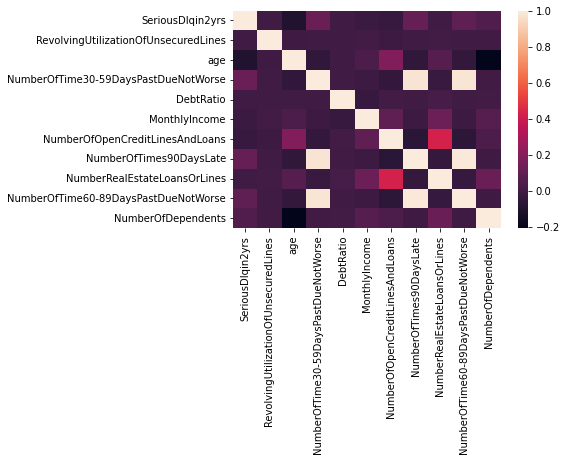

In [8]:
sns.heatmap(train_data.corr())

In [9]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


(array([[0.0000e+00, 0.0000e+00, 1.0060e+03, 2.2780e+03, 2.4280e+03,
         1.6960e+03, 7.0400e+02, 1.9200e+02, 4.9000e+01, 4.0000e+00],
        [1.0000e+00, 0.0000e+00, 8.0460e+03, 2.1413e+04, 2.7482e+04,
         2.5918e+04, 1.9496e+04, 7.4740e+03, 1.9690e+03, 1.1300e+02]]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 2 BarContainer objects>)

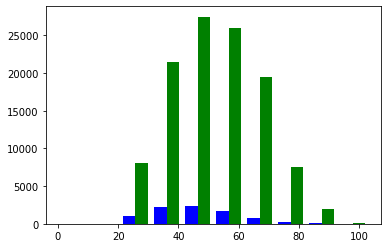

In [10]:
plt.hist([train_data[train_data["SeriousDlqin2yrs"] == 1].age, train_data[train_data["SeriousDlqin2yrs"] == 0].age], color=["blue", "green"])


In [11]:
droped_index = train_data[train_data['RevolvingUtilizationOfUnsecuredLines'] > 3].index

droped_index

Int64Index([   293,    697,   1991,   2331,   4278,   4793,   6760,   6850,
              7447,   7637,
            ...
            144739, 145585, 145587, 147304, 148828, 149102, 149160, 149245,
            149279, 149927],
           dtype='int64', length=210)

In [12]:
train_data.drop(index=droped_index, inplace= True)

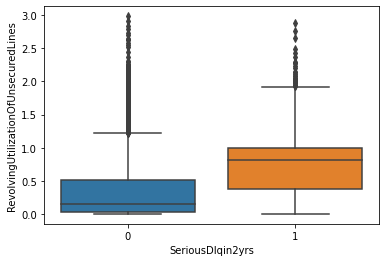

In [13]:
sns.boxplot(data=train_data, y='RevolvingUtilizationOfUnsecuredLines', x="SeriousDlqin2yrs");

We can clearly see that people who utilize unsecured lines are much likely to be in problems 

In [14]:
train_data[train_data['age'] == 0]
train_data.drop(index=65695, inplace=True)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='age'>

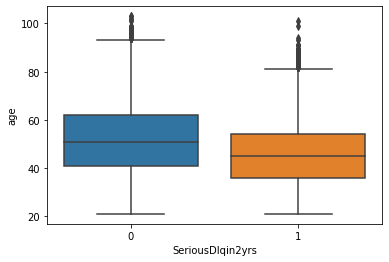

In [15]:
sns.boxplot(data=train_data, y="age", x='SeriousDlqin2yrs')

It's roughly close on the age, but people who had problems are about 5 years younger than their alternatives.

In [16]:
dropped_index2 = train_data[train_data['NumberOfTime30-59DaysPastDueNotWorse'] > 80].index
train_data.drop(index=dropped_index2, inplace=True)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

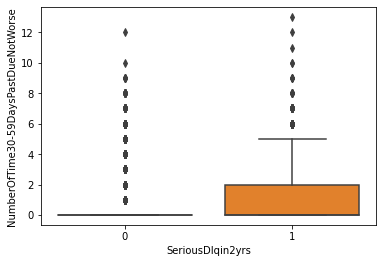

In [17]:
sns.boxplot(data=train_data, y="NumberOfTime30-59DaysPastDueNotWorse", x='SeriousDlqin2yrs')

This would be a very important feature as it shows clear correlation between the distress and the number of times past due for the 30-59 days section as it's zero on their alternatives.

<AxesSubplot:>

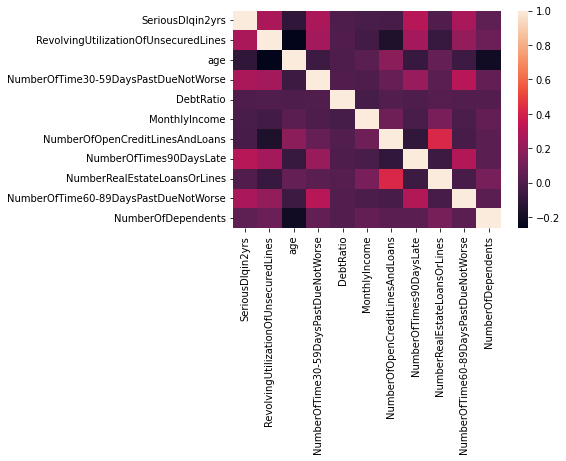

In [18]:
sns.heatmap(train_data.corr())

In [19]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,119910.000000,119910.000000,119910.000000,119910.000000,119910.000000,1.199100e+05,119910.000000,119910.000000,119910.000000,119910.000000,119910.000000
mean,0.068785,0.331549,51.316154,0.261571,26.652685,6.672245e+03,8.773522,0.091427,1.055483,0.067284,0.852147
std,0.253089,0.355661,14.417729,0.719119,425.021753,1.440237e+04,5.168241,0.488846,1.149304,0.335825,1.148622
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034862,41.000000,0.000000,0.144070,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.175990,51.000000,0.000000,0.296361,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.573700,61.000000,0.000000,0.482910,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,2.984534,103.000000,13.000000,61106.500000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [20]:
dropped_index3 = train_data[train_data.DebtRatio > 10].index
train_data.loc[dropped_index3] = 10

dropped_index3 = train_data[train_data.DebtRatio > 4].index
train_data.loc[dropped_index3] = 4

In [21]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,119910.000000,119910.000000,119910.000000,119910.000000,119910.000000,1.199100e+05,119910.000000,119910.000000,119910.000000,119910.000000,119910.000000
mean,0.149962,0.407311,50.386515,0.339046,0.431771,6.664529e+03,8.689634,0.172137,1.117255,0.148228,0.916771
std,0.611279,0.627890,15.751839,0.887998,0.622951,1.440356e+04,5.159884,0.736112,1.202203,0.648830,1.219702
min,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.036440,40.000000,0.000000,0.144070,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.186825,50.000000,0.000000,0.296361,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.613514,61.000000,0.000000,0.482910,8.241000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,4.000000,4.000000,103.000000,13.000000,4.000000,3.008750e+06,57.000000,17.000000,32.000000,11.000000,20.000000


<AxesSubplot:>

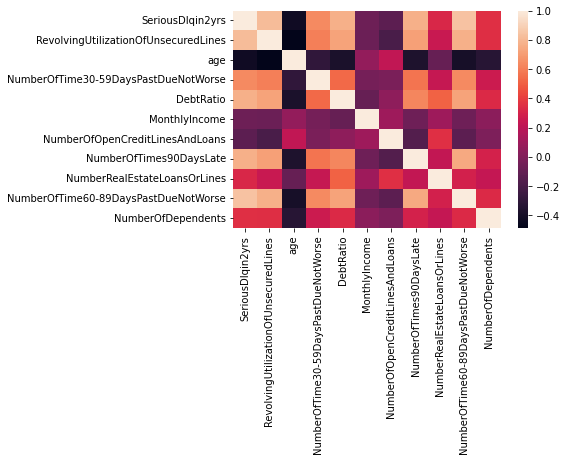

In [22]:
sns.heatmap(train_data.corr())

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>

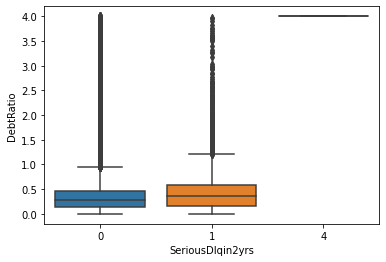

In [23]:
sns.boxplot(data=train_data, y="DebtRatio", x='SeriousDlqin2yrs')

In [24]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,119910.000000,119910.000000,119910.000000,119910.000000,119910.000000,1.199100e+05,119910.000000,119910.000000,119910.000000,119910.000000,119910.000000
mean,0.149962,0.407311,50.386515,0.339046,0.431771,6.664529e+03,8.689634,0.172137,1.117255,0.148228,0.916771
std,0.611279,0.627890,15.751839,0.887998,0.622951,1.440356e+04,5.159884,0.736112,1.202203,0.648830,1.219702
min,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.036440,40.000000,0.000000,0.144070,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.186825,50.000000,0.000000,0.296361,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.613514,61.000000,0.000000,0.482910,8.241000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,4.000000,4.000000,103.000000,13.000000,4.000000,3.008750e+06,57.000000,17.000000,32.000000,11.000000,20.000000


<AxesSubplot:>

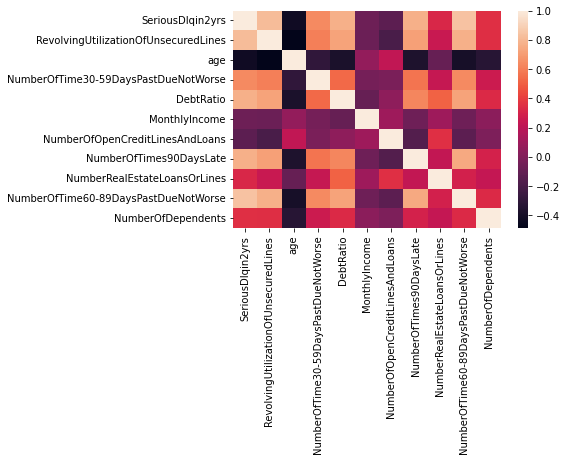

In [25]:
sns.heatmap(train_data.corr())

(0.0, 150.0)

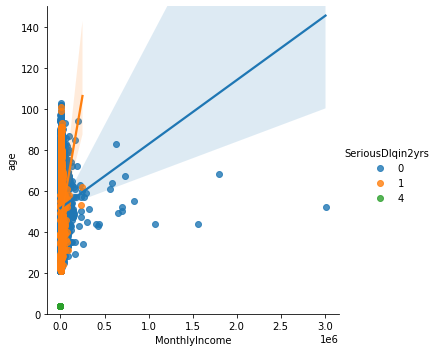

In [26]:
sns.lmplot(x='MonthlyIncome',y='age',data=train_data, hue="SeriousDlqin2yrs")
plt.ylim(0, 150)

In [27]:
q1,q3 = np.percentile(train_data.MonthlyIncome , [25, 75])
iqr = q3-q1
iqr1_5 = q3 + 1.5*iqr
iqr1_5

15502.5

In [28]:
outliers = train_data[train_data["MonthlyIncome"] >= iqr1_5]
outliers

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
45,0,0.000603,70,0,0.177787,16800.0,12,0,1,0,2.0
127,0,0.000000,59,0,0.218854,19167.0,13,0,2,0,0.0
196,0,0.762159,44,4,0.224466,21000.0,5,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
149861,0,0.089997,61,0,0.095543,17499.0,3,0,1,0,0.0
149893,0,0.000000,41,0,0.131958,25833.0,12,0,1,0,5.0
149906,0,0.056999,62,0,0.116106,17750.0,18,0,1,0,3.0
149944,0,0.291860,36,1,0.119287,24000.0,12,0,2,0,0.0


In [29]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [30]:
train_data.drop(index=outliers.index, inplace=True)

In [31]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# **Preparing For Modeling**

In [32]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [33]:
train_col = train_data.columns[1:]
target_col = train_data.columns[0]

In [34]:
inputs = train_data[train_col]
target = train_data[target_col]

In [35]:
def train_and_evaluateRF(train_in, train_targets, val_in, val_targets, **params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    model.fit(train_in, train_targets)
    train_acc = accuracy_score(train_targets, model.predict(train_in))
    val_acc = accuracy_score(val_targets, model.predict(val_in))
    return model, train_acc, val_acc

In [36]:
def train_and_evaluateLR(train_in, train_targets, val_in, val_targets, **params):
    model = LogisticRegression(random_state=42, n_jobs=-1, **params)
    model.fit(train_in, train_targets)
    train_acc = accuracy_score(train_targets, model.predict(train_in))
    val_acc = accuracy_score(val_targets, model.predict(val_in))
    return model, train_acc, val_acc

In [37]:
kfold = KFold(n_splits=10)

In [38]:
print("This Is Random Forest Classifier")
def test_and_showRF(inputs, **params):
    modelsRF = []
    trainRF = []
    valRF = []
    for train_idxs, val_idxs in kfold.split(inputs):
        X_train, train_targets = inputs.iloc[train_idxs], target.iloc[train_idxs]
        X_val, val_targets = inputs.iloc[val_idxs], target.iloc[val_idxs]
        model, train_acc, val_acc = train_and_evaluateRF(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     **params)
        modelsRF.append(model)
        trainRF.append(train_acc)
        valRF.append(val_acc)
        print('Model n° {}, Train accuracy: {}, Validation accuracy: {}'.format(modelsRF.index(model),train_acc, val_acc))
        
    return modelsRF,np.mean(trainRF), np.mean(valRF)
        

This Is Random Forest Classifier


In [39]:
def test_param_and_plotRF(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        print(params)
        model, train_acc, val_acc = test_and_showRF(inputs, **params)
        train_errors.append(train_acc)
        val_errors.append(val_acc)
    plt.figure(figsize=(10,6));
    plt.title('Overfitting curve: ' + param_name);
    plt.plot(param_values, train_errors, 'b-o');
    plt.plot(param_values, val_errors, 'r-o');
    plt.xlabel(param_name);
    plt.ylabel('Accuracy');
    plt.legend(['Training', 'Validation']);

In [40]:
print("This Is Logistic Regressor")
def test_and_showLR(inputs, **params):
    modelsLR = []
    trainLR = []
    valLR = []
    for train_idxs, val_idxs in kfold.split(inputs):
        X_train, train_targets = inputs.iloc[train_idxs], target.iloc[train_idxs]
        X_val, val_targets = inputs.iloc[val_idxs], target.iloc[val_idxs]
        model, train_acc, val_acc = train_and_evaluateLR(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     **params)
        modelsLR.append(model)
        trainLR.append(train_acc)
        valLR.append(val_acc)
        print('Model n° {}, Train accuracy: {}, Validation accuracy: {}'.format(modelsLR.index(model),train_acc, val_acc))
        
    return modelsLR,np.mean(trainLR), np.mean(valLR)


This Is Logistic Regressor


In [41]:
def test_param_and_plotLR(inputs_scaled, param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        print(params)
        model, train_acc, val_acc = test_and_showLR(inputs_scaled, **params)
        train_errors.append(train_acc)
        val_errors.append(val_acc)
    plt.figure(figsize=(10,6));
    plt.title('Overfitting curve: ' + param_name);
    plt.plot(param_values, train_errors, 'b-o');
    plt.plot(param_values, val_errors, 'r-o');
    plt.xlabel(param_name);
    plt.ylabel('Accuracy');
    plt.legend(['Training', 'Validation']);

Let's tune the hyperparams of our model keeping in mind the overfitting.

{'max_depth': 10}
Model n° 0, Train accuracy: 0.9429937228392081, Validation accuracy: 0.9370763080132105
Model n° 1, Train accuracy: 0.9427329792370835, Validation accuracy: 0.9357726403615505
Model n° 2, Train accuracy: 0.9436214389183969, Validation accuracy: 0.9325569268207892
Model n° 3, Train accuracy: 0.942810236600676, Validation accuracy: 0.9340344168260039
Model n° 4, Train accuracy: 0.9430806373732497, Validation accuracy: 0.9350773509473318
Model n° 5, Train accuracy: 0.9426653790439401, Validation accuracy: 0.9387276203719799
Model n° 6, Train accuracy: 0.9429459879672818, Validation accuracy: 0.9340286831812256
Model n° 7, Train accuracy: 0.9428880455041477, Validation accuracy: 0.9342894393741852
Model n° 8, Train accuracy: 0.9428107888866356, Validation accuracy: 0.9350717079530639
Model n° 9, Train accuracy: 0.943032901661983, Validation accuracy: 0.932464146023468
{'max_depth': 15}
Model n° 0, Train accuracy: 0.958348623853211, Validation accuracy: 0.9375108638970971


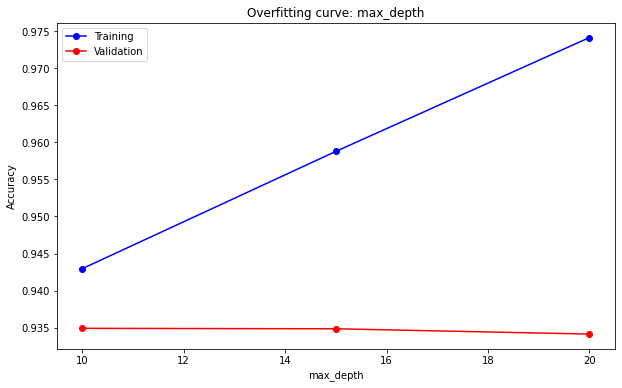

In [42]:
test_param_and_plotRF("max_depth", [10,15,20])

{'max_leaf_nodes': 64}
Model n° 0, Train accuracy: 0.93702559150169, Validation accuracy: 0.9379454197809838
Model n° 1, Train accuracy: 0.9371125060357315, Validation accuracy: 0.9355988180079958
Model n° 2, Train accuracy: 0.9374891356832448, Validation accuracy: 0.9332522162350079
Model n° 3, Train accuracy: 0.9373249637856108, Validation accuracy: 0.9349904397705545
Model n° 4, Train accuracy: 0.9373056494447127, Validation accuracy: 0.9346427950634452
Model n° 5, Train accuracy: 0.9369869628198938, Validation accuracy: 0.9368155744828784
Model n° 6, Train accuracy: 0.937142084576682, Validation accuracy: 0.93541938287701
Model n° 7, Train accuracy: 0.9370358567276028, Validation accuracy: 0.9346371142981312
Model n° 8, Train accuracy: 0.937151741653871, Validation accuracy: 0.9355063016079965
Model n° 9, Train accuracy: 0.9372965978117063, Validation accuracy: 0.932464146023468
{'max_leaf_nodes': 128}
Model n° 0, Train accuracy: 0.9393143408981168, Validation accuracy: 0.937858508

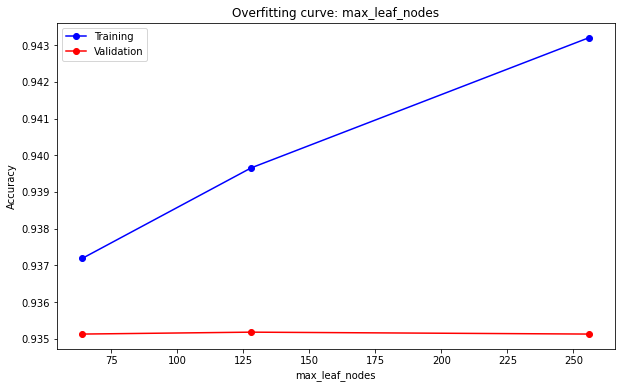

In [43]:
test_param_and_plotRF("max_leaf_nodes", [64,128,256])

{'min_weight_fraction_leaf': 0.042}
Model n° 0, Train accuracy: 0.9308353452438436, Validation accuracy: 0.9353380844776639
Model n° 1, Train accuracy: 0.9311057460164172, Validation accuracy: 0.9329045715278985
Model n° 2, Train accuracy: 0.9316368903911154, Validation accuracy: 0.9281244568051451
Model n° 3, Train accuracy: 0.9314244326412361, Validation accuracy: 0.9300365026942464
Model n° 4, Train accuracy: 0.9312602607436021, Validation accuracy: 0.9315139926994611
Model n° 5, Train accuracy: 0.9309029454369869, Validation accuracy: 0.9347297062402224
Model n° 6, Train accuracy: 0.9314444090351615, Validation accuracy: 0.9298565840938723
Model n° 7, Train accuracy: 0.9314444090351615, Validation accuracy: 0.9298565840938723
Model n° 8, Train accuracy: 0.9311836679510579, Validation accuracy: 0.9322033898305084
Model n° 9, Train accuracy: 0.9316182364245638, Validation accuracy: 0.9282920469361148
{'min_weight_fraction_leaf': 0.045}
Model n° 0, Train accuracy: 0.909415741187832, V

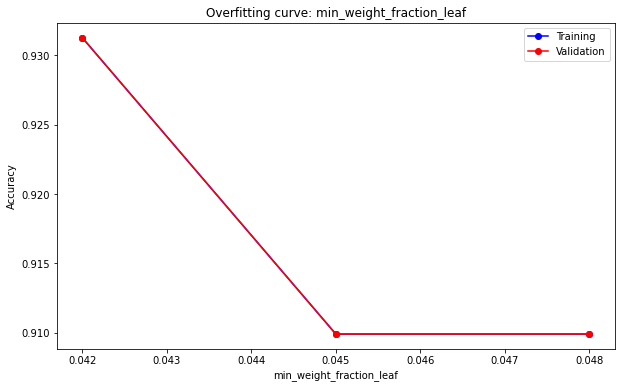

In [44]:
test_param_and_plotRF("min_weight_fraction_leaf", [0.042,0.045,0.048])

In [45]:
test_and_showRF(inputs, max_depth=10, max_leaf_nodes=128, min_weight_fraction_leaf=0.04)

Model n° 0, Train accuracy: 0.9307967165620473, Validation accuracy: 0.9350773509473318
Model n° 1, Train accuracy: 0.9310478029937228, Validation accuracy: 0.9328176603511211
Model n° 2, Train accuracy: 0.931569290197972, Validation accuracy: 0.9281244568051451
Model n° 3, Train accuracy: 0.9313664896185417, Validation accuracy: 0.9299495915174691
Model n° 4, Train accuracy: 0.9311926605504587, Validation accuracy: 0.9315139926994611
Model n° 5, Train accuracy: 0.9308353452438436, Validation accuracy: 0.9347297062402224
Model n° 6, Train accuracy: 0.9313768094948383, Validation accuracy: 0.9298565840938723
Model n° 7, Train accuracy: 0.9313864665720273, Validation accuracy: 0.9297696653628857
Model n° 8, Train accuracy: 0.9311160684107348, Validation accuracy: 0.9322033898305084
Model n° 9, Train accuracy: 0.9315602939614296, Validation accuracy: 0.9282051282051282


([RandomForestClassifier(max_depth=10, max_leaf_nodes=128,
                         min_weight_fraction_leaf=0.04, n_jobs=-1,
                         random_state=42),
  RandomForestClassifier(max_depth=10, max_leaf_nodes=128,
                         min_weight_fraction_leaf=0.04, n_jobs=-1,
                         random_state=42),
  RandomForestClassifier(max_depth=10, max_leaf_nodes=128,
                         min_weight_fraction_leaf=0.04, n_jobs=-1,
                         random_state=42),
  RandomForestClassifier(max_depth=10, max_leaf_nodes=128,
                         min_weight_fraction_leaf=0.04, n_jobs=-1,
                         random_state=42),
  RandomForestClassifier(max_depth=10, max_leaf_nodes=128,
                         min_weight_fraction_leaf=0.04, n_jobs=-1,
                         random_state=42),
  RandomForestClassifier(max_depth=10, max_leaf_nodes=128,
                         min_weight_fraction_leaf=0.04, n_jobs=-1,
                         rand

In [46]:
modelRF, train_accRF, valid_accRF = test_and_showRF(inputs, max_depth=8, max_leaf_nodes=128, min_weight_fraction_leaf=0.04)

Model n° 0, Train accuracy: 0.9307967165620473, Validation accuracy: 0.9350773509473318
Model n° 1, Train accuracy: 0.9310478029937228, Validation accuracy: 0.9328176603511211
Model n° 2, Train accuracy: 0.931569290197972, Validation accuracy: 0.9281244568051451
Model n° 3, Train accuracy: 0.9313664896185417, Validation accuracy: 0.9299495915174691
Model n° 4, Train accuracy: 0.9311926605504587, Validation accuracy: 0.9315139926994611
Model n° 5, Train accuracy: 0.9308353452438436, Validation accuracy: 0.9347297062402224
Model n° 6, Train accuracy: 0.9313768094948383, Validation accuracy: 0.9298565840938723
Model n° 7, Train accuracy: 0.9313864665720273, Validation accuracy: 0.9297696653628857
Model n° 8, Train accuracy: 0.9311160684107348, Validation accuracy: 0.9322033898305084
Model n° 9, Train accuracy: 0.9315602939614296, Validation accuracy: 0.9282051282051282


In [47]:
from sklearn import preprocessing

inputs_col = inputs.columns

scaler = preprocessing.MinMaxScaler().fit(train_data[train_data.columns[1:]])
inputs[inputs_col] = scaler.transform(inputs[inputs_col])
inputs

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.191532,0.414141,0.153846,0.200746,0.588349,0.228070,0.000000,0.24,0.0,0.10
1,0.239288,0.363636,0.000000,0.030469,0.167731,0.070175,0.000000,0.00,0.0,0.05
2,0.164545,0.343434,0.076923,0.021278,0.196245,0.035088,0.058824,0.00,0.0,0.00
3,0.058452,0.262626,0.000000,0.009012,0.212889,0.087719,0.000000,0.00,0.0,0.00
5,0.053295,0.707071,0.000000,0.093902,0.225792,0.052632,0.000000,0.04,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...
149994,0.096436,0.464646,0.000000,0.101073,0.219341,0.122807,0.000000,0.00,0.0,0.00
149995,0.010168,0.707071,0.000000,0.056283,0.135475,0.070175,0.000000,0.04,0.0,0.00
149996,0.074936,0.404040,0.000000,0.179141,0.360235,0.070175,0.000000,0.04,0.0,0.10
149998,0.000000,0.262626,0.000000,0.000000,0.368750,0.070175,0.000000,0.00,0.0,0.00


{'max_iter': 10}
Model n° 0, Train accuracy: 0.9325929502655722, Validation accuracy: 0.9359464627151052
Model n° 1, Train accuracy: 0.9325543215837759, Validation accuracy: 0.9345558838866678
Model n° 2, Train accuracy: 0.9332496378561081, Validation accuracy: 0.9296888579871372
Model n° 3, Train accuracy: 0.932901979719942, Validation accuracy: 0.9313401703459064
Model n° 4, Train accuracy: 0.9328440366972477, Validation accuracy: 0.9320354597601251
Model n° 5, Train accuracy: 0.9324577498792854, Validation accuracy: 0.9362071962454371
Model n° 6, Train accuracy: 0.9326901719925448, Validation accuracy: 0.9329856584093872
Model n° 7, Train accuracy: 0.9329605701538373, Validation accuracy: 0.9307257714037375
Model n° 8, Train accuracy: 0.9327481144556788, Validation accuracy: 0.9331594958713603
Model n° 9, Train accuracy: 0.9329315989222702, Validation accuracy: 0.9309865275966971
{'max_iter': 50}
Model n° 0, Train accuracy: 0.9343022694350556, Validation accuracy: 0.9371632191899878

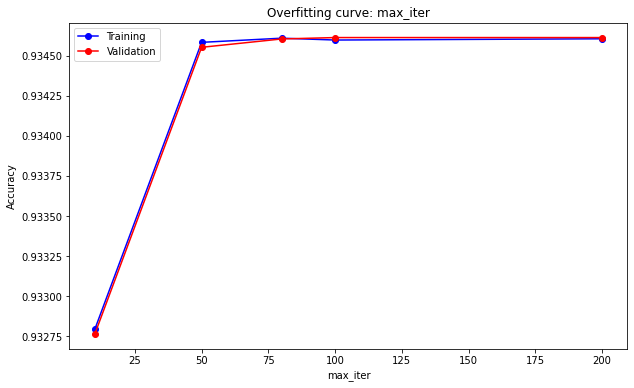

In [48]:
test_param_and_plotLR(inputs, "max_iter", [10,50,80,100,200])

{'fit_intercept': True}
Model n° 0, Train accuracy: 0.9342926122646065, Validation accuracy: 0.9372501303667652
Model n° 1, Train accuracy: 0.9344567841622404, Validation accuracy: 0.9363810185989918
Model n° 2, Train accuracy: 0.9349879285369387, Validation accuracy: 0.9306448809316878
Model n° 3, Train accuracy: 0.9347464992757122, Validation accuracy: 0.9333391274117852
Model n° 4, Train accuracy: 0.9346016417189763, Validation accuracy: 0.9342082391795585
Model n° 5, Train accuracy: 0.9342539835828102, Validation accuracy: 0.9375977750738745
Model n° 6, Train accuracy: 0.9346312445075373, Validation accuracy: 0.9348978704910909
Model n° 7, Train accuracy: 0.9346215874303483, Validation accuracy: 0.9342025206431986
Model n° 8, Train accuracy: 0.9345829591215923, Validation accuracy: 0.9348978704910909
Model n° 9, Train accuracy: 0.9348147289741287, Validation accuracy: 0.9327249022164277
{'fit_intercept': False}
Model n° 0, Train accuracy: 0.9337421535490101, Validation accuracy: 0.

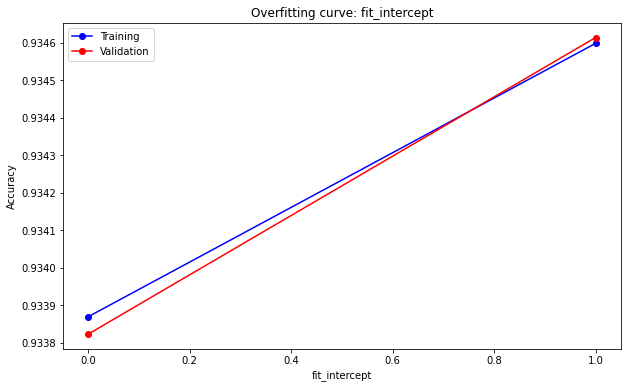

In [49]:
test_param_and_plotLR(inputs, "fit_intercept", [True, False])

In [50]:
modelLR, train_accLR, val_accLR = test_and_showLR(inputs, max_iter=80, fit_intercept=True)

Model n° 0, Train accuracy: 0.9343408981168517, Validation accuracy: 0.9371632191899878
Model n° 1, Train accuracy: 0.9344084983099952, Validation accuracy: 0.9364679297757692
Model n° 2, Train accuracy: 0.9350362143891839, Validation accuracy: 0.9306448809316878
Model n° 3, Train accuracy: 0.9347561564461613, Validation accuracy: 0.9333391274117852
Model n° 4, Train accuracy: 0.9346209560598745, Validation accuracy: 0.9344689727098905
Model n° 5, Train accuracy: 0.9342829550941574, Validation accuracy: 0.9375108638970971
Model n° 6, Train accuracy: 0.9345926161987813, Validation accuracy: 0.9348978704910909
Model n° 7, Train accuracy: 0.9346409015847263, Validation accuracy: 0.9342025206431986


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model n° 8, Train accuracy: 0.9345539878900252, Validation accuracy: 0.9348978704910909


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model n° 9, Train accuracy: 0.9348726714372628, Validation accuracy: 0.932464146023468


In [51]:
modelLR[5], train_accLR, val_accLR

(LogisticRegression(max_iter=80, n_jobs=-1, random_state=42),
 0.9346105855527019,
 0.9346057401565065)

In [52]:
modelRF[0], train_accRF, valid_accRF

(RandomForestClassifier(max_depth=8, max_leaf_nodes=128,
                        min_weight_fraction_leaf=0.04, n_jobs=-1,
                        random_state=42),
 0.9312247943605616,
 0.9312247526053146)

# Summary
We successfully performed the data science process on this dataset:
1. Downloaded the dataset
2. Cleaned from Nan values and outliers
3. Performed EDA.
4. Trained the model and tuned hyperparameters
5. Predicted the test data

We can notice that LogisticRegression generally performed better that RandomForestClassifier, and out of the ten models the fifth was the best with a score of 0.9346 for validation set with hyperparameters tuning.

Considering the scoring method it's a reasonable number. Plus these are the features that are most important


In [53]:
feature_imp = pd.DataFrame({
    'Feature' : modelRF[0].feature_names_in_,
    'Importance' : modelRF[0].feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feature_imp

,Feature,Importance
6,NumberOfTimes90DaysLate,0.334501
0,RevolvingUtilizationOfUnsecuredLines,0.269623
2,NumberOfTime30-59DaysPastDueNotWorse,0.178894
8,NumberOfTime60-89DaysPastDueNotWorse,0.092714
3,DebtRatio,0.048067
7,NumberRealEstateLoansOrLines,0.029751
1,age,0.028956
4,MonthlyIncome,0.013812
5,NumberOfOpenCreditLinesAndLoans,0.002931
9,NumberOfDependents,0.000750


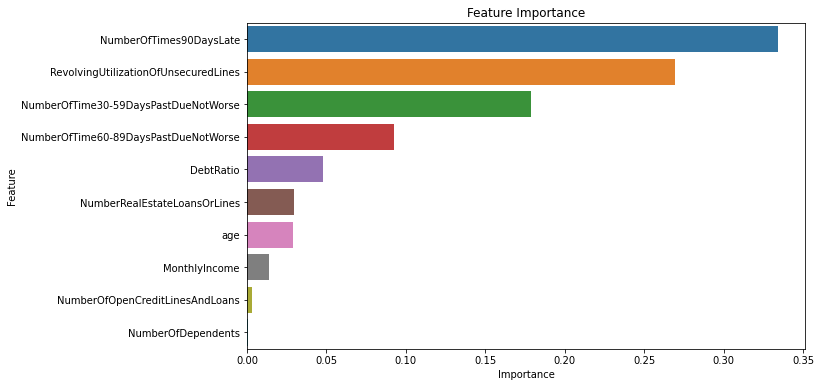

In [54]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data = feature_imp, x = 'Importance', y = 'Feature');

# Predicting Test Data

In [55]:
test_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [56]:
test_data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [57]:
test_data.drop(["SeriousDlqin2yrs"], axis=1, inplace=True)

In [58]:
index1 = test_data[ test_data["RevolvingUtilizationOfUnsecuredLines"] > 4].index
test_data.iloc[index1].RevolvingUtilizationOfUnsecuredLines = 4

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         81400 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    98877 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


In [60]:
imputer = SimpleImputer(strategy = 'mean').fit(test_data[["MonthlyIncome", "NumberOfDependents"]])
test_data[["MonthlyIncome", "NumberOfDependents"]] = imputer.transform(test_data[["MonthlyIncome", "NumberOfDependents"]])

In [61]:
preds = modelRF[0].predict(test_data)

In [62]:
preds

array([0, 0, 0, ..., 0, 0, 0])

I don't actually know why the model outputs [0,4] binary values but the 4s are in place of 1s.

In [63]:
for i in range(len(preds)):
    if preds[i] != 0:
        preds[i] = 1
        

In [64]:
df = pd.DataFrame(
{
    "Id": test_data.index+1,
    "Probability": preds
})

In [65]:
df.nunique()

Id             101503
Probability         2
dtype: int64

In [66]:
df.value_counts()

Id      Probability
1       0              1
67678   0              1
67676   0              1
67675   0              1
67674   0              1
                      ..
33833   0              1
33832   0              1
33831   0              1
33830   0              1
101503  0              1
Length: 101503, dtype: int64

In [67]:
df.to_csv("./submission.csv", index=False)

# Conclusion

It was a very interesting study, That aside if I intrigued your mind and teased your curiosity please feel free to check my kaggle account where i do studies like these under Abdelbasset Elhorri.

Moreover, These some of the best datasets I could pull off:

- Driver Alertness Detection: https://www.kaggle.com/c/stayalert
- Eye Movement Verification and Identification https://www.kaggle.com/c/emvic
- Hourly Rain Prediction https://www.kaggle.com/c/how-much-did-it-rain

Thank you for your time